In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
wine_file = "wine_final.csv"

In [6]:
wine_df = pd.read_csv(wine_file, sep=",")

In [7]:
# wine_df.head()

# -= Sorting wine =-

## Sorting by color

In [ ]:
white_wines = wine_df[wine_df["color"] == "white"]

In [ ]:
white_wines = white_wines[["variety", "points", "price"]]

In [ ]:
white_wines_mean_price = white_wines[(white_wines["price"] <= 30) & (white_wines["price"] >= 28)]

In [ ]:
white_wines_mean_price = white_wines_mean_price.groupby("variety", as_index=False)["points"].mean()

In [ ]:
white_wines_mean_price.sort_values(by="points", ascending=False).head(10)

In [ ]:
red_wines = wine_df[wine_df["color"] == "red"]

In [ ]:
red_wines = red_wines[["variety", "points", "price"]]

In [ ]:
red_wines_mean_price = red_wines[(red_wines["price"] <= 30) & (red_wines["price"] >= 28)]

In [ ]:
white_wines_mean_price = white_wines_mean_price.groupby("variety", as_index=False)["points"].mean()

## Sorting by rating

In [8]:
wine_df = wine_df.sort_values(by="country")

In [9]:
wine_df["country_count"] = wine_df.apply(lambda wine_df: 1 if wine_df["country"] != "" else 0, axis = 1)

In [10]:
countries = wine_df.groupby("country", as_index=False)["country_count"].sum()

In [18]:
country_count = countries["country_count"]

In [20]:
wines_sorted_by_country = wine_df.sort_values(by="country")

In [21]:
wines_sorted_by_country = wines_sorted_by_country.groupby("country", as_index=False)["points", "price"].mean()

In [26]:
wines_sorted_by_country["wines_count"] = countries["country_count"]

In [27]:
wines_sorted_by_country = wines_sorted_by_country.sort_values(by="points", ascending=False).head(10)

In [28]:
wines_sorted_by_country

,country,points,price,country_count,wines_count
13,England,91.762712,52.677966,59,59
19,India,90.250000,13.750000,8,8
3,Austria,90.219637,31.336751,2536,2536
16,Germany,89.878011,43.460789,1951,1951
7,Canada,89.312500,35.776786,224,224
18,Hungary,89.265625,42.234375,128,128
9,China,89.000000,18.000000,1,1
23,Luxembourg,88.800000,23.400000,5,5
14,France,88.748127,41.994105,16286,16286
27,Morocco,88.708333,18.958333,24,24


## Graph by rating

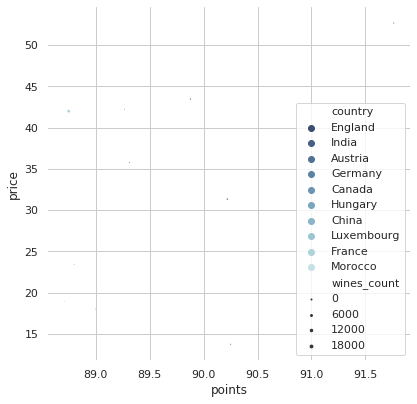

In [29]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = list(wines_sorted_by_country["country"])
sns.scatterplot(x="points", y="price",
                hue="country", size="wines_count",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=wines_sorted_by_country, ax=ax)

## Sorting by price

In [ ]:
wine_sorted_by_price = wine_df.groupby(["country", "title"], as_index=False)["price"].mean()

In [ ]:
wine_sorted_by_price = wine_sorted_by_price.sort_values(by="price", ascending=False)

In [ ]:
wine_sorted_by_price["country_count"] = wine_sorted_by_price.groupby("title")["title"].transform("count")

## Winery sorted by rating

In [ ]:
winery_sorted_by_rating = wine_df.groupby("winery", as_index=False)["points"].mean()

In [ ]:
winery_sorted_by_rating = winery_sorted_by_rating.sort_values(by="points", ascending=False)

In [ ]:
winery_sorted_by_rating

# -= Graphs =-

## Top wines rating graph

In [ ]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = list(wines_sorted_by_country["country"])
sns.scatterplot(x="points", y="price",
                hue="country", size="country_count",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=wines_sorted_by_country, ax=ax)

## Top wines price graph

## Top wineries graph